In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
detail_path = r"C:\Users\USER\Documents\University\Data_Science_FP-main\Cleaned data output\cleaned_birth_data_detailed.xls"
summary_path = r"C:\Users\USER\Documents\University\Data_Science_FP-main\Cleaned data output\cleaned_birth_data_summary.xls"
birth_data_detailed = pd.read_csv(detail_path)
birth_data_summary = pd.read_csv(summary_path)

In [67]:
birth_data_summary

,ZIP_Code_of_Residence,Year_of_Birth,Total_Births_All,LBW_Count,Pct_LBW,High_Risk
0,90001,2018,913.0,77.0,8.433735,1
1,90001,2019,821.0,71.0,8.647990,1
2,90001,2020,762.5,48.5,6.360656,0
3,90001,2021,729.5,57.5,7.882111,0
4,90001,2022,710.0,54.0,7.605634,0
...,...,...,...,...,...,...
1330,93591,2018,103.0,16.5,16.019417,1
1331,93591,2019,90.5,11.0,12.154696,1
1332,93591,2020,84.5,11.0,13.017751,1
1333,93591,2021,94.5,11.0,11.640212,1


In [68]:
birth_data_detailed

,Type_of_Event,Year_of_Birth,Residence_or_Place_of_Birth,ZIP_Code_of_Residence,Birthweight_Grams,Total_Births
0,Birth,2022,Place of Residence,91101,500 - 999 grams,0.0
1,Birth,2022,Place of Residence,91101,1000 - 1499 grams,5.5
2,Birth,2022,Place of Residence,91101,1500 - 1999 grams,5.5
3,Birth,2022,Place of Residence,91101,2000 - 2499 grams,5.5
4,Birth,2022,Place of Residence,91101,2500 - 2999 grams,50.0
...,...,...,...,...,...,...
10190,Birth,2018,Place of Residence,91331,2000 - 2499 grams,61.0
10191,Birth,2018,Place of Residence,91331,2500 - 2999 grams,230.0
10192,Birth,2018,Place of Residence,91331,3000 - 3499 grams,526.0
10193,Birth,2018,Place of Residence,91331,3500 - 3999 grams,323.0


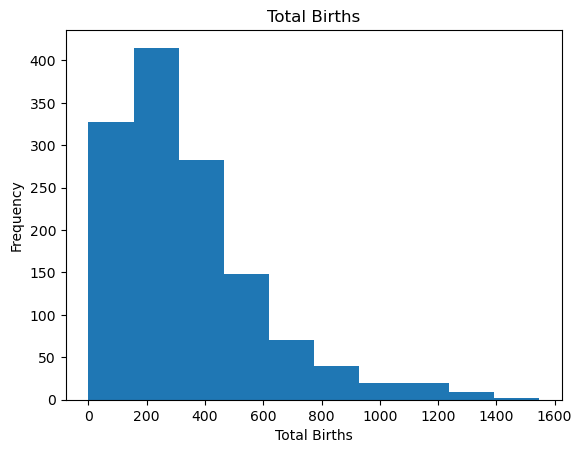

In [69]:
plt.hist(birth_data_summary["Total_Births_All"])
plt.xlabel("Total Births")
plt.ylabel("Frequency")
plt.title("Total Births")
plt.show()

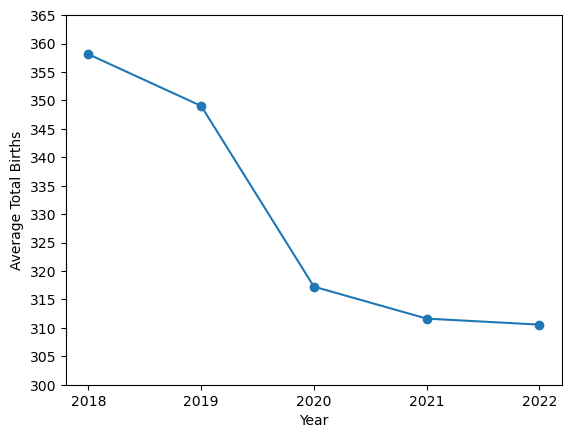

In [70]:
avg = birth_data_summary.groupby("Year_of_Birth")["Total_Births_All"].mean().reset_index()

plt.plot(avg["Year_of_Birth"], avg["Total_Births_All"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average Total Births")
plt.ylim(bottom=300)
plt.xticks(ticks=range(min(avg["Year_of_Birth"]), max(avg["Year_of_Birth"])+1, 1))
plt.yticks(ticks=range(300, 370, 5))
plt.show()

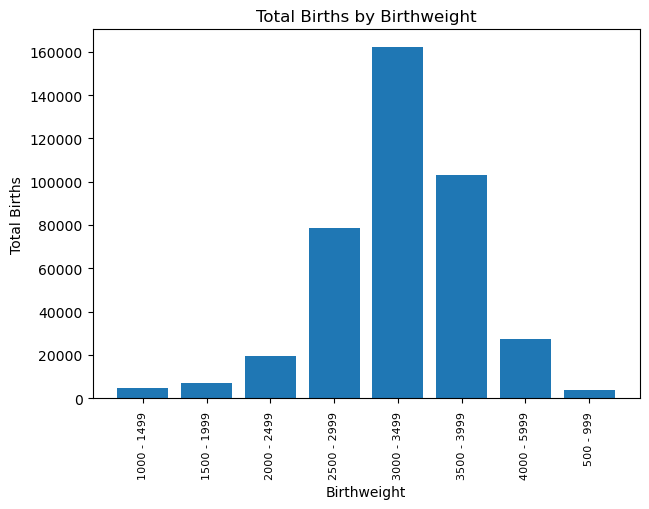

In [71]:
birth_weight = birth_data_detailed.groupby("Birthweight_Grams")["Total_Births"].sum().reset_index()
birth_weight["Birthweight_Grams"] = birth_weight["Birthweight_Grams"].str.replace("grams", "")

plt.bar(birth_weight["Birthweight_Grams"], birth_weight["Total_Births"])
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.xlabel("Birthweight")
plt.ylabel("Total Births")
plt.title("Total Births by Birthweight")
plt.show()

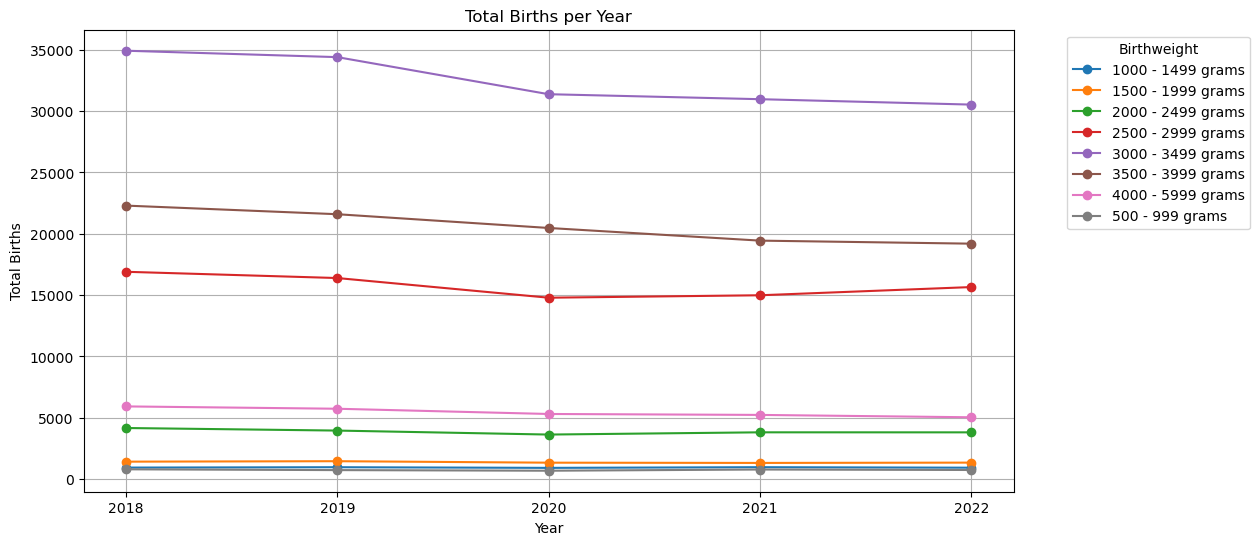

In [72]:
pivot = birth_data_detailed.pivot_table(
    index="Year_of_Birth",
    columns="Birthweight_Grams",
    values="Total_Births",
    aggfunc="sum"
)

pivot.plot(marker="o", figsize=(12, 6))

plt.xticks(ticks=range(pivot.index.min(), pivot.index.max() + 1, 1))
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.title("Total Births per Year")
plt.legend(title="Birthweight", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
